# **Import Modules**

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import seaborn as sns #sstatistical  data visualisation 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error

# **Import Data**

In [2]:
train_df = pd.read_csv('/kaggle/input/shai-club/train.csv')
test_df = pd.read_csv('/kaggle/input/shai-club/test.csv')

# **Data Wrangling**

In [3]:
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
#remove ID column
df = train_df.drop('Id', axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


We can see there are:
- **2 Integer** type features.
- **6 Float type** features.
- **3 Object type** features.

So, we have to encode those categorical features as we can feed only numerical features into the machine learning model.

# **Data Cleaning**

Start cleaning data, first find out if there is any NULL values?

In [7]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Then, find out duplicated data.

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43147    False
43148    False
43149    False
43150    False
43151    False
Length: 43152, dtype: bool

In [9]:
df.duplicated().sum()

97

In [10]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

In [11]:
df.shape

(43055, 10)

# **Data Preprocessing**

* **Encoding Categorical Variables:** convert categorical variables to numerical variables where the measurement or number has a numerical meaning.

In [12]:
# #one hot encoding method
# df = pd.get_dummies(df)
# df.head()

Using Ordinal Encoding:

In [13]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:", object_cols)

Categorical variables: ['cut', 'color', 'clarity']


In [14]:
# Apply label_encoder to each column with categorical data
# label_encoder = LabelEncoder()
# for col in object_cols:
#     df[col] = label_encoder.fit_transform(df[col])

# le = LabelEncoder()
# df[object_cols] = df[object_cols].apply(le.fit_transform)

encoder = OrdinalEncoder()
df[object_cols] = encoder.fit_transform(df[object_cols])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2.0,5.0,3.0,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3.0,3.0,7.0,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2.0,2.0,5.0,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2.0,3.0,5.0,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3.0,4.0,7.0,61.0,57.0,2596,5.76,5.72,3.50


In [15]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000
mean,0.797752,2.555801,2.593822,3.831425,61.746373,57.459798,3930.016235,5.731555,5.735063,3.538528
std,0.473198,1.027038,1.701862,1.725080,1.435066,2.234325,3984.939986,1.120732,1.148389,0.707922
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5312.500000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* **Handling outliers:** find out if there is outliers in the data that will affect the model.

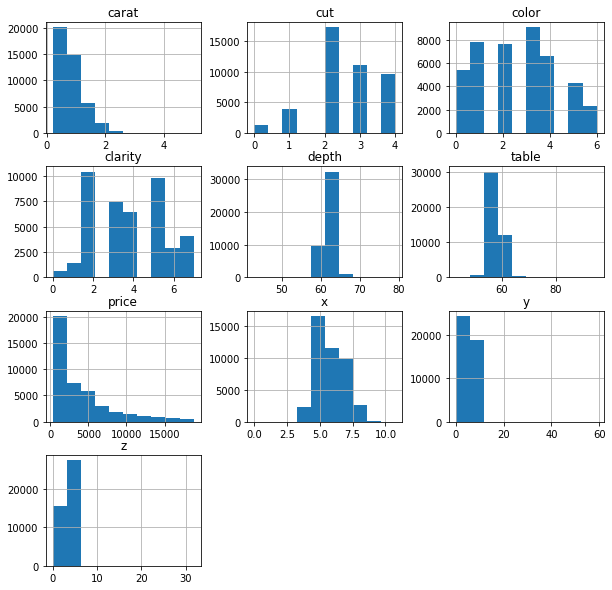

In [16]:
df.hist(figsize = (10,10));

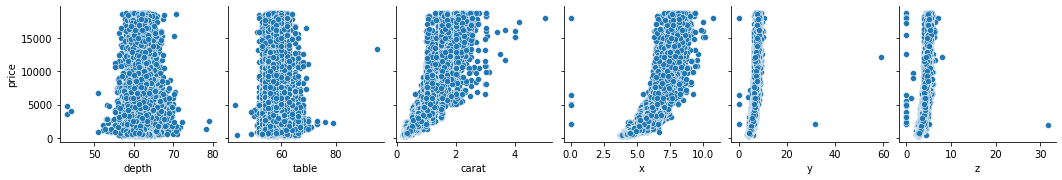

In [17]:
sns.pairplot(data=df,x_vars=["depth","table","carat",'x', 'y','z'],y_vars="price",diag_kind=None)

Graph here show some zero values we didn't detect before. **Let's make sure.**

In [18]:
temp = df[['x','y','z','depth','table','carat','price']].replace(0,np.NaN)
temp.isnull().sum()

x         5
y         4
z        17
depth     0
table     0
carat     0
price     0
dtype: int64

In [19]:
#Dropping dimensionless diamonds
df.drop(df[df['x']==0].index,inplace=True)
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)
df.shape

(43038, 10)

After delete **dimensionless data** [this is missing information if included will affect the outcome of the model results], let's find out more close to **outliers**.

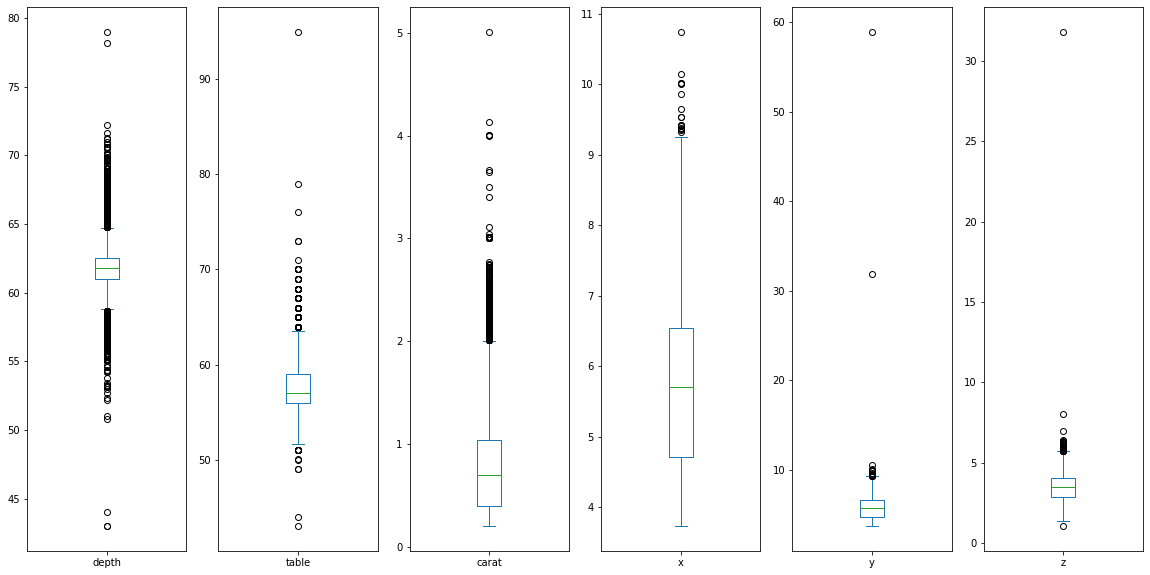

In [20]:
data = df[['depth', 'table', 'carat', 'x', 'y', 'z']]
data.plot(kind='box',figsize=(20,10),subplots=True)
plt.show()

In [21]:
#Dropping the outliers. 
df = df[(df["y"]<20)]
df = df[(df["z"]<10) & (df["z"]>2)]
df = df[(df["carat"]<4)]
df = df[(df["table"]<80) & (df["table"]>45)]
df = df[(df["depth"]<80) & (df["depth"]>45)]
df.shape

(43021, 10)

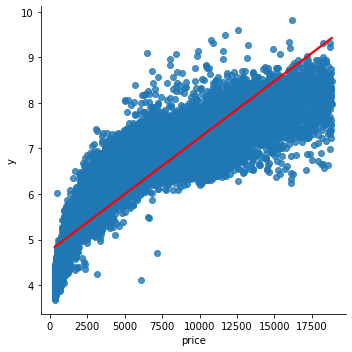

In [22]:
sns.lmplot(x="price", y="y", data=df, line_kws={"color": 'red'})

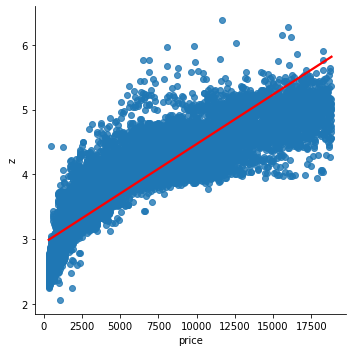

In [23]:
sns.lmplot(x="price", y="z", data=df, line_kws={"color": 'red'})

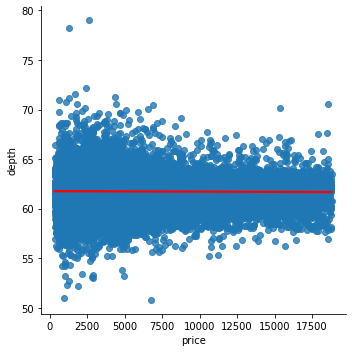

In [24]:
sns.lmplot(x="price", y="depth", data=df, line_kws={"color": 'red'})

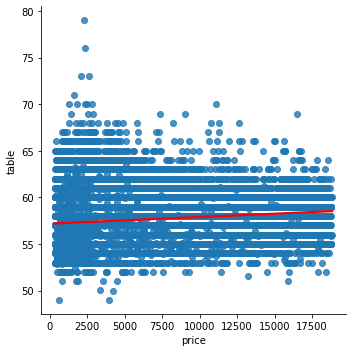

In [25]:
sns.lmplot(x="price", y="table", data=df, line_kws={"color": 'red'})

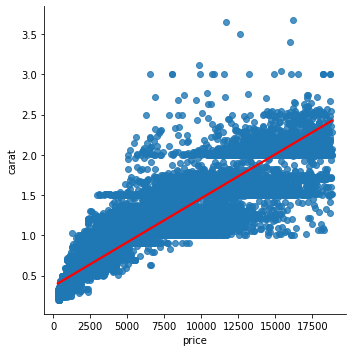

In [26]:
sns.lmplot(x="price", y="carat", data=df, line_kws={"color": 'red'})

In [27]:
# def iqr_outliers(column):
#     Q1,Q3 = np.percentile(column , [25,75])
#     iqr = Q3 - Q1
#     lower_range = Q1 - (1.5 * iqr)
#     upper_range = Q3 + (1.5 * iqr)
#     return lower_range,upper_range  

In [28]:
# caratlower,caratupper = iqr_outliers(df.carat)
# df.drop(df[ (df.carat > caratupper) | (df.carat < caratlower) ].index , inplace=True)

# **Feature Engineering**

In [29]:
# df['volume'] = df['x']*df['y']*df['z']

Eliminat some features that lead to the same result, as we see in our data **depth = z / mean(x, y)**

In [30]:
df.drop(labels=['x','y','z'],axis=1,inplace=True)
df.shape

(43021, 7)

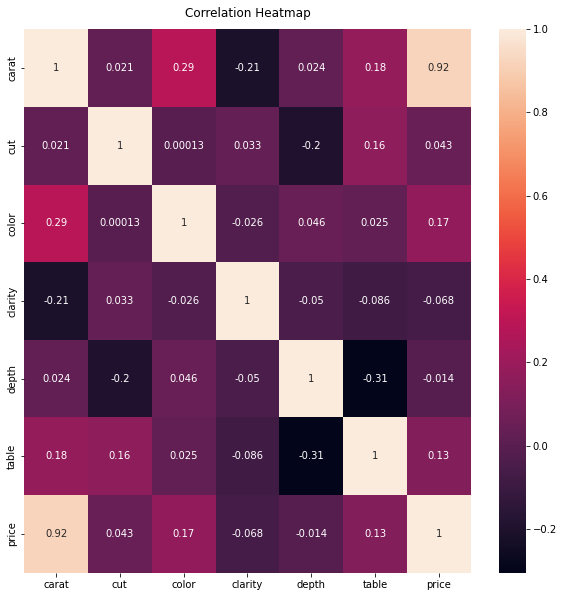

In [31]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# **Model Building**

In [32]:
# Assigning the featurs as X and trarget as y
X= df.drop(["price"],axis =1)
y= df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [34]:
# For the sake of automation, let's create a function to train the model and generate the variance score 

def R2_function(regressor,X_train,y_train,X_test,y_test):
    regressor.fit(X_train,y_train)
    predictions = regressor.predict(X_test)
    return (metrics.explained_variance_score(y_test,predictions))

In [35]:
# Instanciating all the models that we are going to apply

rfr = RandomForestRegressor()
xgb = xgboost.XGBRegressor()
tree = DecisionTreeRegressor()
cat = CatBoostRegressor()
lgb = lightgbm.LGBMRegressor()

In [36]:
models_list = [rfr, xgb, tree, cat, lgb]

for model in models_list:
    print(f'{model} R2 score is: {R2_function(model,X_train,y_train,X_test,y_test)} \n')

RandomForestRegressor() R2 score is: 0.9801848438716161 

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None) R2 score is: 0.9820149179031492 

DecisionTreeRegressor() R2 score is: 0.964316396778318 

Learning rate set to 0.072957
0:	learn: 3739.1556563	total: 56.1ms	remaining: 56s
1:	learn: 3506.8112684	total: 60.6ms	remaining: 30.2s
2:	learn: 3289.4665105	total: 64.4ms	re

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# #params_dict = {'objective':["reg:squarederror"], 'n_estimators':[40,60,80,100]}
# #GridSearch = GridSearchCV(estimator=xgb, param_grid=params_dict,scoring='r2')
# parameters = {'objective':["RMSE"], 'iterations':[1000,1500,2000,2500]}
# GridSearch = GridSearchCV(estimator=cat, param_grid=parameters, scoring='r2')
# GridSearch.fit(X,y)
# print("Done")

In [39]:
# GridSearch.best_params_

In [40]:
GridSearch_BestParam = CatBoostRegressor(objective='RMSE', iterations=2000)
#GridSearch_BestParam = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=62)
#GridSearch_BestParam = RandomForestRegressor(n_estimators=80)

GridSearch_BestParam.fit(X_train,y_train)
predictions = GridSearch_BestParam.predict(X_test)
print(f"R2 score: {metrics.explained_variance_score(y_test,predictions)}")
print(f"Mean absolute error: {metrics.mean_absolute_error(y_test,predictions)}")
print(f"Mean squared error: {metrics.mean_squared_error(y_test,predictions)}")
print(f"Root Mean squared error: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")
model = GridSearch_BestParam.fit(X, y)

Learning rate set to 0.041527
0:	learn: 3849.9831517	total: 5.78ms	remaining: 11.6s
1:	learn: 3712.5733143	total: 10.8ms	remaining: 10.8s
2:	learn: 3579.6703538	total: 15.1ms	remaining: 10.1s
3:	learn: 3448.6300506	total: 19.5ms	remaining: 9.74s
4:	learn: 3326.5525705	total: 23.9ms	remaining: 9.52s
5:	learn: 3210.1051399	total: 28.2ms	remaining: 9.38s
6:	learn: 3099.5121669	total: 32.3ms	remaining: 9.19s
7:	learn: 2991.5867276	total: 36.6ms	remaining: 9.12s
8:	learn: 2888.1758388	total: 41.1ms	remaining: 9.1s
9:	learn: 2792.6668036	total: 45.2ms	remaining: 9s
10:	learn: 2698.7954336	total: 49.9ms	remaining: 9.02s
11:	learn: 2608.7538841	total: 54.6ms	remaining: 9.04s
12:	learn: 2521.3742158	total: 59.2ms	remaining: 9.05s
13:	learn: 2441.3490378	total: 63.5ms	remaining: 9.01s
14:	learn: 2362.4360264	total: 67.8ms	remaining: 8.97s
15:	learn: 2290.6092655	total: 72ms	remaining: 8.93s
16:	learn: 2218.7628153	total: 76.7ms	remaining: 8.95s
17:	learn: 2149.9181775	total: 81.2ms	remaining: 8.

# **Prepare Testing**

In [41]:
test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


Applying what we made in the training data to be fit with testing data.

In [42]:
# test_df['volume'] = test_df['x']*test_df['y']*test_df['z']

In [43]:
test_df.drop(labels=['x','y','z'],axis=1,inplace=True)
test_df.shape

(10788, 7)

In [44]:
# #one hot encoding method for test
# test_df = pd.get_dummies(test_df)
# test_df.head()

In [45]:
# Get list of categorical variables
s2 = (test_df.dtypes =="object")
object_cols_test = list(s2[s2].index)
print("Categorical variables:", object_cols_test)

Categorical variables: ['cut', 'color', 'clarity']


In [46]:
# Apply label_encoder to each column with categorical data
encoder = OrdinalEncoder()
test_df[object_cols] = encoder.fit_transform(test_df[object_cols])
test_df.head()

,Id,carat,cut,color,clarity,depth,table
0,1,0.34,2.0,3.0,7.0,61.1,57.0
1,2,0.71,3.0,1.0,5.0,62.7,58.0
2,3,0.44,4.0,5.0,4.0,62.8,56.0
3,4,0.81,3.0,1.0,3.0,60.1,59.0
4,5,0.40,2.0,3.0,6.0,61.2,56.0


In [47]:
#remove ID column
test = test_df.drop('Id', axis=1)

In [48]:
predictions = pd.Series(model.predict(test))
pred = pd.DataFrame({'Id':test_df['Id'],'price':predictions})

# **File Output**

In [49]:
pred.to_csv('submission.csv',index=False)
pred.head()

,Id,price
0,1,856.726133
1,2,2800.619816
2,3,834.977505
3,4,2697.039974
4,5,1124.212259


In [50]:
pred.shape

(10788, 2)